# configuration

In [19]:

# common standard libraries
import datetime
import time
import os
# common external libraries

import pandas as pd
import numpy as np
import sklearn # scikit learn
import requests
from bs4 import BeautifulSoup
# visualisation libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# setting plot appearance
# see here for more options: https://matplotlib.org/customization.html

%config InlineBackend.figure_format ='retina'
sns.set() # this reverts to matploiulib default
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style('darkgrid')

#ignoire warnings(dont display stderr)

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# loading data set

In [20]:
from sklearn import datasets
boston = datasets.load_boston()

In [21]:
# this checks the object that the data set comes from
type(boston)
# from output, the based object is bunch

sklearn.utils.Bunch

In [32]:
from sklearn.utils import Bunch

In [31]:
Bunch?

In [22]:
# what fields are the dictionary
# print the field names
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [29]:
# print the dataset description
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [65]:
# Creating a pandas Dataframe
import pandas as pd

In [66]:
pd.DataFrame?  # this reveals information about pandas dataframes

SyntaxError: invalid syntax (3539771911.py, line 1)

In [67]:
# task is to  feed the bostopn data as the data and the feature_names as the header

boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [68]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [69]:
# loading the data into a dataframe
df = pd.DataFrame(data = boston['data'],columns= boston['feature_names'])

In [70]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [71]:
# adding the taret variables
df['MEDV']= boston['target']

In [72]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [73]:
# the target var could be moved the start of the data frame like so

y = df['MEDV'].copy()

In [74]:
del df['MEDV']

In [75]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [76]:
df = pd.concat((y, df), axis = 1)

In [77]:
df

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [49]:
# check for missing values
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# deleting some columns in a loop

In [78]:


for col in ['ZN','NOX','RAD','PTRATIO','B']:
    del df[col]

In [79]:
df

,MEDV,CRIM,INDUS,CHAS,RM,AGE,DIS,TAX,LSTAT
0,24.0,0.00632,2.31,0.0,6.575,65.2,4.0900,296.0,4.98
1,21.6,0.02731,7.07,0.0,6.421,78.9,4.9671,242.0,9.14
2,34.7,0.02729,7.07,0.0,7.185,61.1,4.9671,242.0,4.03
3,33.4,0.03237,2.18,0.0,6.998,45.8,6.0622,222.0,2.94
4,36.2,0.06905,2.18,0.0,7.147,54.2,6.0622,222.0,5.33
...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,11.93,0.0,6.593,69.1,2.4786,273.0,9.67
502,20.6,0.04527,11.93,0.0,6.120,76.7,2.2875,273.0,9.08
503,23.9,0.06076,11.93,0.0,6.976,91.0,2.1675,273.0,5.64
504,22.0,0.10959,11.93,0.0,6.794,89.3,2.3889,273.0,6.48


In [80]:
# the analysis could be ran focusing on some columns
cols = ['RM','AGE','TAX','LSTAT','MEDV']

In [81]:
df[cols].head()

,RM,AGE,TAX,LSTAT,MEDV
0,6.575,65.2,296.0,4.98,24.0
1,6.421,78.9,242.0,9.14,21.6
2,7.185,61.1,242.0,4.03,34.7
3,6.998,45.8,222.0,2.94,33.4
4,7.147,54.2,222.0,5.33,36.2


# looking for patterns in the data set

# pairwise correlation

In [83]:
# pairwise correlation for the selected colulmns
df[cols].corr()

,RM,AGE,TAX,LSTAT,MEDV
RM,1.000000,-0.240265,-0.292048,-0.613808,0.695360
AGE,-0.240265,1.000000,0.506456,0.602339,-0.376955
TAX,-0.292048,0.506456,1.000000,0.543993,-0.468536
LSTAT,-0.613808,0.602339,0.543993,1.000000,-0.737663
MEDV,0.695360,-0.376955,-0.468536,-0.737663,1.000000


# VISUALISATION

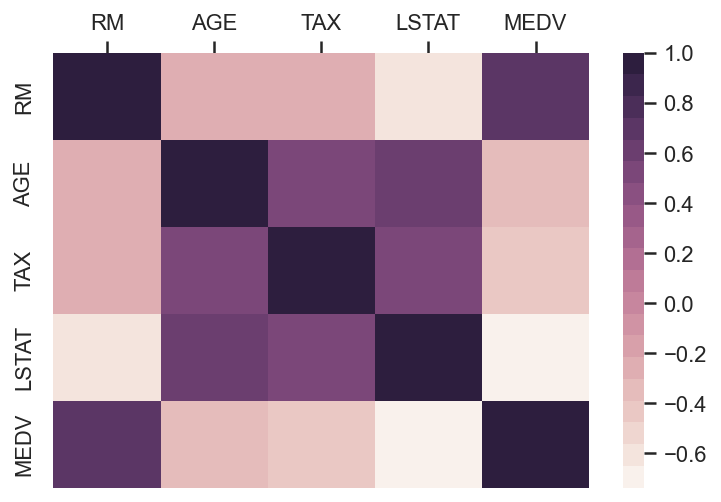

In [85]:
%matplotlib inline
ax= sns.heatmap(df[cols].corr(), cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15)) # cubehelix_palette this overides the default custom colors
ax.xaxis.tick_top() # move labels to the top

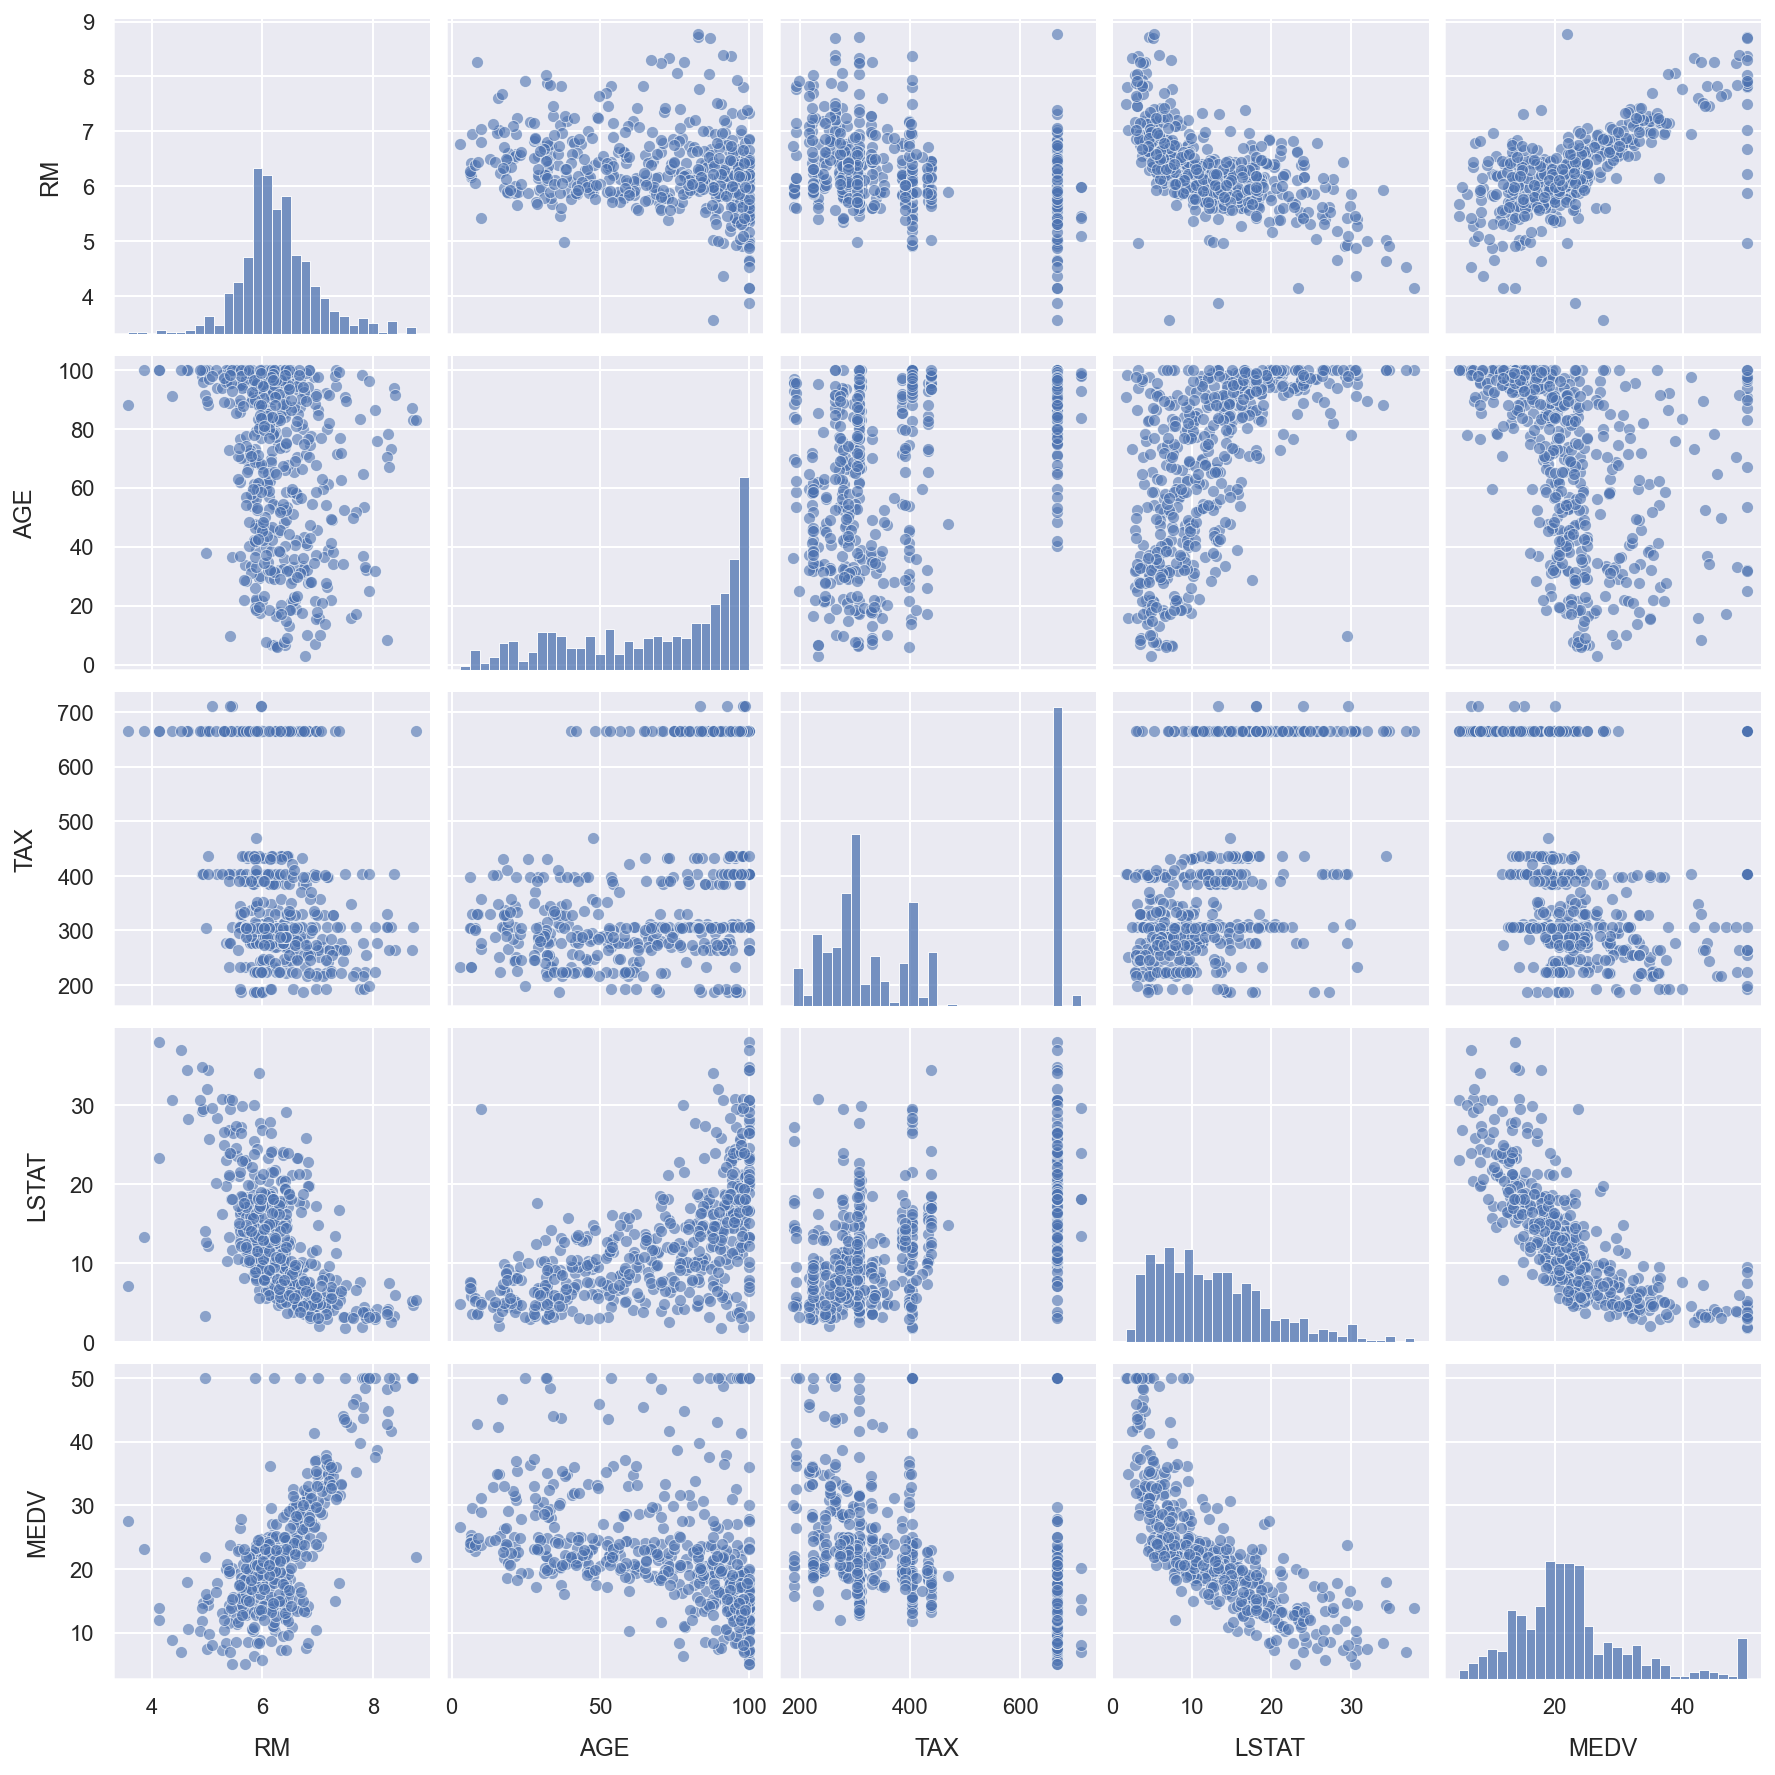

In [86]:
# visualise data using seaborns pairplot function
sns.pairplot(df[cols],
            plot_kws={'alpha': 0.6},
            diag_kws ={'bins':30})